In [1]:
# Import all neccessary libraries and packages as well as importing csv file and displaying head:

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

df = pd.read_csv("covid_19_uk_cases.csv")
df.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0


In [2]:
# Select only channel island and relevant rows and collumns. Quickly check the head to confirm:

df = df[df['Province/State']=="Channel Islands"]

df = df[['Date','Hospitalised']]

df.head()

,Date,Hospitalised
2528,2020-01-22,0.0
2529,2020-01-23,0.0
2530,2020-01-24,0.0
2531,2020-01-25,0.0
2532,2020-01-26,0.0


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

df['mm'] = pd.to_datetime(df.Date).dt.month

In [4]:
# Create rolling mean of h numbers over last seven days:

df['7-Day Rolling Mean']=df.Hospitalised.rolling(7).mean()

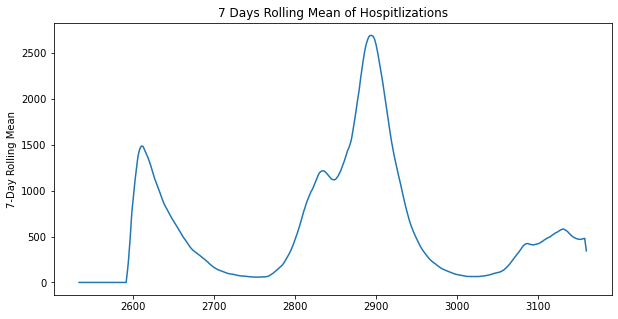

In [5]:
# Declare all dimensions, axis etc and plot data from rolling mean:

plt.figure(figsize=(10,5))
plt.plot(df["7-Day Rolling Mean"])
plt.ylabel("7-Day Rolling Mean")
plt.title("7 Days Rolling Mean of Hospitlizations")
plt.show()

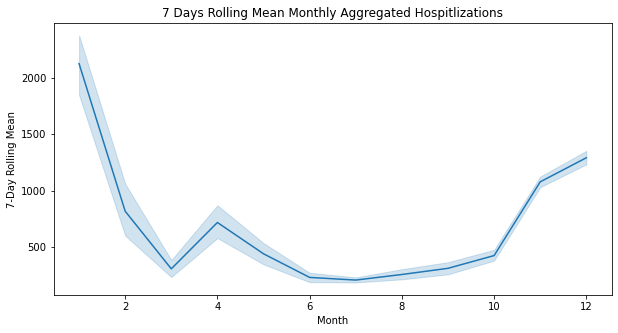

In [6]:
# Confidence levels for smoothed values:

plt.figure(figsize=(10,5))
plt.title("7 Days Rolling Mean Monthly Aggregated Hospitlizations")
plt.xlabel("Month")
sns.lineplot(data=df, x="mm", y="7-Day Rolling Mean")
plt.show()

In [7]:
# Values:

# Mean abslute square:
a1=np.array(df['Hospitalised'])
a2=np.array(df['7-Day Rolling Mean'])
a2=np.nan_to_num(a2) 
from sklearn.metrics import mean_absolute_error as mae
error = mae(a1,a2)
print("Mean absolute error : " + str(error))


# Standart deviation:
print("standard Deviation : ", np.std(np.array(df['Hospitalised'])))


# Upper and lower bounds:
LowerBound=df['7-Day Rolling Mean'].min()
UpperBound=df['7-Day Rolling Mean'].max()
print("Lower Bound:",LowerBound," \nUpper Bound: ",UpperBound)

Mean absolute error : 44.75
standard Deviation :  641.05986081099
Lower Bound: 0.0  
Upper Bound:  2690.4285714285716


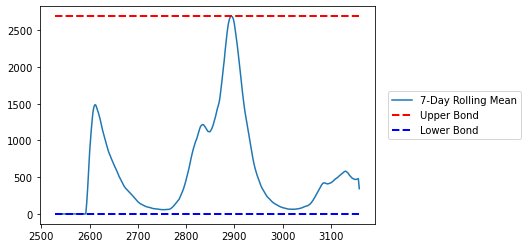

In [8]:
# Format upper and lower bounds:

ax = df['7-Day Rolling Mean'].plot()
ax.hlines(y=UpperBound, xmin=2528, xmax=3159, colors='red', linestyles='--', lw=2, label='Upper Bond')
ax.hlines(y=LowerBound, xmin=2528, xmax=3159, colors='blue', linestyles='--', lw=2, label='Lower Bond')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()

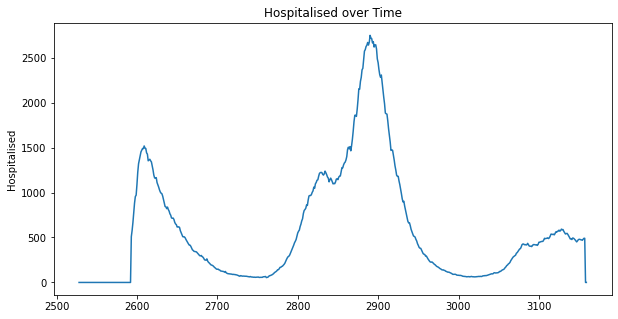

In [9]:
# Plot actual values for whole:

plt.figure(figsize=(10,5))
df['Hospitalised'].plot()
plt.ylabel("Hospitalised")
plt.title("Hospitalised over Time")
plt.show()

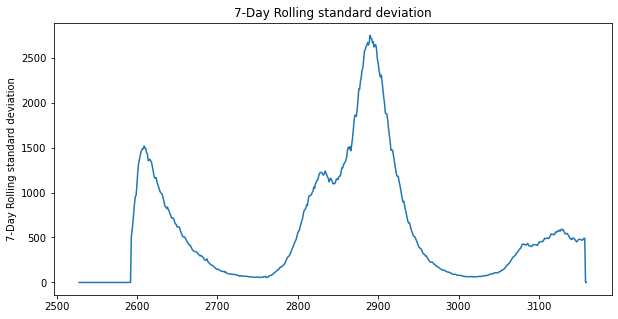

In [10]:
def mean_absolute_error(a, b):
    return np.mean(np.abs(b-a))

# Visualize standart deviation of rolling mean per day:

s = df['Hospitalised']
s.rolling(7).std()
plt.figure(figsize=(10,5))
plt.plot(s)
plt.ylabel("7-Day Rolling standard deviation")
plt.title("7-Day Rolling standard deviation")
plt.show()

In [11]:
# Top three days where MAE between actual and seven-day rolling average is highest.

def AbsoluteError(a, b):
  try:
    return abs(a-b)
  except:
    None
df['AbsoluteError'] = df[['Hospitalised','7-Day Rolling Mean']].apply(lambda x: AbsoluteError(*x), axis=1)


# Sort and depict top three rows by error:

df.sort_values(by=['Hospitalised'], ascending=False).head(3)

,Date,Hospitalised,mm,7-Day Rolling Mean,AbsoluteError
2890,2021-01-18,2748.0,1,2654.285714,93.714286
2891,2021-01-19,2719.0,1,2672.857143,46.142857
2892,2021-01-20,2712.0,1,2685.428571,26.571429
